In [1]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [2]:
model = Sequential()
# Select 6 feature convolution kernels with a size of 3 * 3 (without offset), and get 6 feature maps. The size of each feature map is 32−3 + 1 = 30.
# That is, the number of neurons has been reduced from 1024 to 30 ∗ 30 = 900 .
# Parameters between input layer and C1 layer: 6 ∗ (3 ∗ 3 + 1)
model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# The input of this layer is the output of the first layer, which is a 30 * 30 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 15 * 15 * 6, the filter size used is 3 * 3, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 13 * 13 * 16. This layer has 3 * 3 * 6 * 16 + 16 = 880 parameters
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
# The input matrix size of this layer is 13 * 13- * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 6 * 6 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 3 * 3, #
# So it is not different from the fully connected layer. If the nodes in the 3 * 3 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 3 * 3 * 16 * 120 + 120 = 17400 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(2, activation='softmax'))
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train',
                                                 target_size = (32, 32),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\test',
                                            target_size = (32, 32),
                                            batch_size = 16,
                                            class_mode = 'categorical')

r=model.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 50,
                         validation_data = test_set,    
                         validation_steps = len(test_set))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
501/501 [==============================] - 15s 29ms/step - loss: 0.6748 - accuracy: 0.5701 - val_loss: 0.6567 - val_accuracy: 0.6273
Epoch 2/50
501/501 [==============================] - 14s 29ms/step - loss: 0.6202 - accuracy: 0.6515 - val_loss: 0.7480 - val_accuracy: 0.5793
Epoch 3/50
501/501 [==============================] - 14s 29ms/step - loss: 0.5992 - accuracy: 0.6781 - val_loss: 0.5819 - val_accuracy: 0.6881
Epoch 4/50
501/501 [==============================] - 14s 29ms/step - loss: 0.5807 - accuracy: 0.6931 - val_loss: 0.6046 - val_accuracy: 0.6569
Epoch 5/50
501/501 [==============================] - 15s 29ms/step - loss: 0.5658 - accuracy: 0.7049 - val_loss: 0.5482 - val_accuracy: 0.7158
Epoch 6/50
501/501 [==============================] - 15s 29ms/step - loss: 0.5565 - accuracy: 0.7144 - val_loss: 0.5958

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 6)         168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

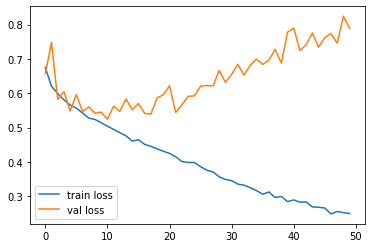

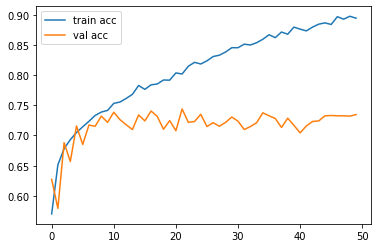

<Figure size 432x288 with 0 Axes>

In [5]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [6]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Asus-2020\Downloads\\Cat and Dog\\test\\dogs\\dog.4040.jpg', target_size = (32, 32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
#training_set.class_indices
print(result)
if result[0][0] == 1:
    prediction = 'Cat'
    print(prediction)
else:
    prediction = 'Dog'
    print(prediction)

[[0. 1.]]
Dog
